## Clean text data

In [42]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Tokenize words

In [43]:
# Run only if this is the first ever time using nltk
# nltk.download()

In [44]:
df = pd.read_csv("../Cognitive Services/Text Analytics/tweets.csv")

In [ ]:
[nltk.sent_tokenize(item) for item in df["text"].values]

In [ ]:
tokens = [nltk.word_tokenize(item) for item in df["text"].values]
tokens

### Remove punctuation

In [47]:
import string
import re

regex = re.compile(f'[{re.escape(string.punctuation)}]')

tokens_without_punctuation = [regex.sub(u'', word) for words in tokens for word in words if not regex.sub(u'', word) == u'']
tokens_without_punctuation[:10]

['Host',
 'a',
 'Website',
 'with',
 'Azure',
 'Functions',
 'and',
 'NodeJS',
 'Part',
 '2']

### Remove stop words

In [48]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words.append("via")
stop_words

words = [token for token in tokens_without_punctuation if token not in stop_words]
words[:15]

['Host',
 'Website',
 'Azure',
 'Functions',
 'NodeJS',
 'Part',
 '2',
 'Logging',
 'wintellectuals',
 'https',
 'tcoRCkBadYCSK',
 'dotnet',
 'DotNetKicks',
 'CsharpCorner',
 'pmohammedramees']

### Remove links

In [64]:
import re
    
regex = re.compile('http\S+')

tokens_without_links = [regex.sub(u'', word) for word in words if not regex.sub(u'', word) == u'' and not word.startswith("tc")]
tokens_without_links[:20]

['Host',
 'Website',
 'Azure',
 'Functions',
 'NodeJS',
 'Part',
 '2',
 'Logging',
 'wintellectuals',
 'dotnet',
 'DotNetKicks',
 'CsharpCorner',
 'pmohammedramees',
 'mcbeniwal',
 'stratisplatform',
 'graphitegtc',
 'infragistics',
 'glutoken',
 'jetbrains',
 'GrapeCityUS']

### Stem words

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(word) for word in tokens_without_links]
stemmed_words[:10]

In [ ]:
from collections import Counter

counter = Counter(stemmed_words)
counter.most_common(20)

In [52]:
def plot_words(words, values):
    indexes = np.arange(len(words))
    plt.xticks(indexes, words, rotation=90)
    plt.bar(indexes, values)

In [ ]:
plot_words(counter.keys(), counter.values())

In [54]:
most_common_words = [word for word, _ in counter.most_common(20)]
most_common_values = [count for _, count in counter.most_common(20)]

In [ ]:
plot_words(most_common_words, most_common_values)

### Lemmatize words

In [63]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_without_links]
lemmatized_words[:20]

['Host',
 'Website',
 'Azure',
 'Functions',
 'NodeJS',
 'Part',
 '2',
 'Logging',
 'wintellectuals',
 'dotnet',
 'DotNetKicks',
 'CsharpCorner',
 'pmohammedramees',
 'mcbeniwal',
 'stratisplatform',
 'graphitegtc',
 'infragistics',
 'glutoken',
 'jetbrains',
 'GrapeCityUS']

In [57]:
lemmatized_counter = Counter(lemmatized_words)
lemmatized_counter.most_common(20)

[('Wintellect', 15),
 ('CsharpCorner', 9),
 ('stratisplatform', 8),
 ('Data', 8),
 ('graphitegtc', 7),
 ('infragistics', 7),
 ('glutoken', 7),
 ('Host', 6),
 ('Website', 6),
 ('Azure', 6),
 ('Functions', 6),
 ('NodeJS', 6),
 ('Part', 6),
 ('jetbrains', 6),
 ('jprosise', 6),
 ('wintellectuals', 5),
 ('dotnet', 5),
 ('DotNetKicks', 5),
 ('mcbeniwal', 5),
 ('1', 5)]

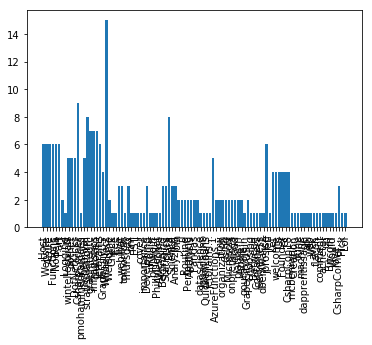

In [58]:
plot_words(lemmatized_counter.keys(), lemmatized_counter.values())

In [59]:
most_common_words = [word for word, _ in lemmatized_counter.most_common(20)]
most_common_values = [count for _, count in lemmatized_counter.most_common(20)]

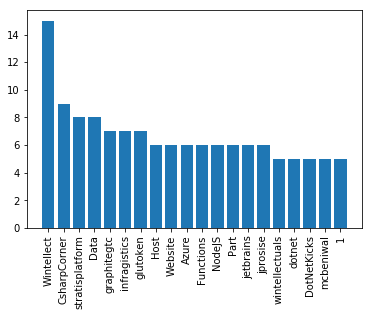

In [60]:
plot_words(most_common_words, most_common_values)

In [61]:
pd.DataFrame({
    "words": lemmatized_words
}).to_csv("words.csv", index=False, encoding="UTF-8")